# Pancreas using RNA-velocity
When scRNA-velocity is available, it can be used to guide the trajectory inference and automate initial state prediction. However, because RNA velocitycan be misguided by(Bergen 2021) boosts in expression, variable transcription rates and data capture scope limited to steady-state populations only, users might find it useful to adjust the level of influence the RNA-velocity data should exercise on the inferred TI.

We use a familiar endocrine-genesis dataset (Bastidas-Ponce et al. (2019).) to demonstrate initial state prediction at the EP Ngn3 low cells and automatic captures of the 4 differentiated islets (alpha, beta, delta and epsilon). As mentioned, it us useful to control the level of influence of RNA-velocity relative to gene-gene distance and this is done using the velo_weight parameter. 

### Load the data

The dataset consists of 2531 endocrine cells differentiating. We apply basic filtering and normalization using scanpy.

In [11]:
#import core_working as via
import pyVIA.core as via 
import scanpy as sc
import scvelo as scv
import cellrank as cr
import pandas as pd
scv.settings.verbosity = 3
scv.settings.set_figure_params('scvelo')
cr.settings.verbosity = 2
import warnings
warnings.simplefilter("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=DeprecationWarning)
adata = cr.datasets.pancreas()

print(adata)
min_shared_counts=20
scv.pp.filter_and_normalize(adata, min_shared_counts=min_shared_counts, n_top_genes=5000)

AnnData object with n_obs × n_vars = 2531 × 27998
    obs: 'day', 'proliferation', 'G2M_score', 'S_score', 'phase', 'clusters_coarse', 'clusters', 'clusters_fine', 'louvain_Alpha', 'louvain_Beta', 'palantir_pseudotime'
    var: 'highly_variable_genes'
    uns: 'clusters_colors', 'clusters_fine_colors', 'day_colors', 'louvain_Alpha_colors', 'louvain_Beta_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'


Filtered out 22024 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.


Extracted 5000 highly variable genes.
Logarithmized X.


**Use scvelo to computed the rna-velocity based on the spliced/unspliced counts**

In [12]:
n_pcs = 30
knn = 20
sc.tl.pca(adata, n_comps = n_pcs)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)
scv.tl.velocity(adata, mode='stochastic') # good results acheived with mode = 'stochastic' too

#should you choose dynamical mode, remeber to run, recover_dynamics(). This is a bit slower
#scv.tl.recover_dynamics(adata)
#scv.tl.velocity(adata, mode='dynamical')

computing moments based on connectivities


    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


### Initialize and run VIA

2022-07-09 15:07:57.874047	Running VIA over input data of 2531 (samples) x 30 (features)


2022-07-09 15:07:58.947213	Finished global pruning of 20-knn graph used for clustering. Kept 49.3 % of edges. 
2022-07-09 15:07:58.959907	Number of connected components used for clustergraph  is 1


2022-07-09 15:07:59.977406	The number of components in the original full graph is 1
2022-07-09 15:07:59.977510	For downstream visualization purposes we are also constructing a low knn-graph 


2022-07-09 15:08:01.044132	Commencing community detection
2022-07-09 15:08:01.134455	Finished running Leiden algorithm. Found 67 clusters.
2022-07-09 15:08:01.135762	Merging 50 very small clusters (<10)
2022-07-09 15:08:01.137312	Finished detecting communities. Found 17 communities
2022-07-09 15:08:01.137616	Making cluster graph. Global cluster graph pruning level: 0.5
2022-07-09 15:08:01.144254	Graph has 1 connected components before pruning
2022-07-09 15:08:01.145769	Graph has 1 connected components before pruning n_nonz 9 30
2022-07-09 15:08:01.147689	Graph has 1 connected components before pruning
2022-07-09 15:08:01.149077	Graph has 1 connected components before pruning n_nonz 9 30
2022-07-09 15:08:01.149596	0.0% links trimmed from local pruning relative to start
2022-07-09 15:08:01.149631	51.8% links trimmed from global pruning relative to start


2022-07-09 15:08:02.713804	 Looking for initial states
2022-07-09 15:08:02.715086	Stationary distribution normed [0.064 0.1   0.039 0.082 0.02  0.185 0.003 0.025 0.018 0.029 0.01  0.064
 0.15  0.04  0.056 0.026 0.088]
2022-07-09 15:08:02.715717	Top 3 candidates for root: [ 6 10  8] with stationary prob (%) [0.34 0.96 1.83]
2022-07-09 15:08:02.716087	Top 5 candidates for terminal: [ 5 12  1 16  3]
2022-07-09 15:08:02.741373	Using the RNA velocity graph, A top3 candidate for initial state is 6 comprising predominantly of Ngn3 low EP cells
2022-07-09 15:08:02.742541	Using the RNA velocity graph, A top3 candidate for initial state is 10 comprising predominantly of Ngn3 high EP cells
2022-07-09 15:08:02.743535	Using the RNA velocity graph, A top3 candidate for initial state is 8 comprising predominantly of Ngn3 high EP cells
2022-07-09 15:08:02.743714	Using the RNA velocity graph, the suggested initial root state is 6 comprising predominantly of Ngn3 low EP cells
2022-07-09 15:08:02.743841	

2022-07-09 15:08:03.401410	Identifying terminal clusters corresponding to unique lineages...
2022-07-09 15:08:03.401585	Closeness:[0, 4, 5, 6, 7, 10, 12, 15]
2022-07-09 15:08:03.401625	Betweenness:[0, 2, 3, 4, 5, 6, 7, 10, 12, 13, 15]
2022-07-09 15:08:03.401655	Out Degree:[1, 2, 4, 5, 6, 10, 12, 13, 15]
2022-07-09 15:08:03.403935	Terminal clusters corresponding to unique lineages in this component are [2, 5, 12, 13, 15] 


2022-07-09 15:08:03.594866	From root 6,  the Terminal state 2 is reached 347 times.


2022-07-09 15:08:03.819951	From root 6,  the Terminal state 5 is reached 418 times.


2022-07-09 15:08:04.045192	From root 6,  the Terminal state 12 is reached 389 times.


2022-07-09 15:08:04.313512	From root 6,  the Terminal state 13 is reached 277 times.


2022-07-09 15:08:04.540457	From root 6,  the Terminal state 15 is reached 309 times.
2022-07-09 15:08:04.564247	Terminal clusters corresponding to unique lineages are [2, 5, 12, 13, 15] 
2022-07-09 15:08:04.564351	Begin projection of pseudotime and lineage likelihood


2022-07-09 15:08:04.949911	Transition matrix with weight of 0.5 on RNA velocity
2022-07-09 15:08:04.951223	Graph has 1 connected components before pruning
2022-07-09 15:08:04.952588	Graph has 1 connected components before pruning n_nonz 2 2
2022-07-09 15:08:04.955097	Graph has 1 connected components after reconnecting
2022-07-09 15:08:04.955258	44.8% links trimmed from local pruning relative to start
2022-07-09 15:08:04.955293	69.0% links trimmed from global pruning relative to start


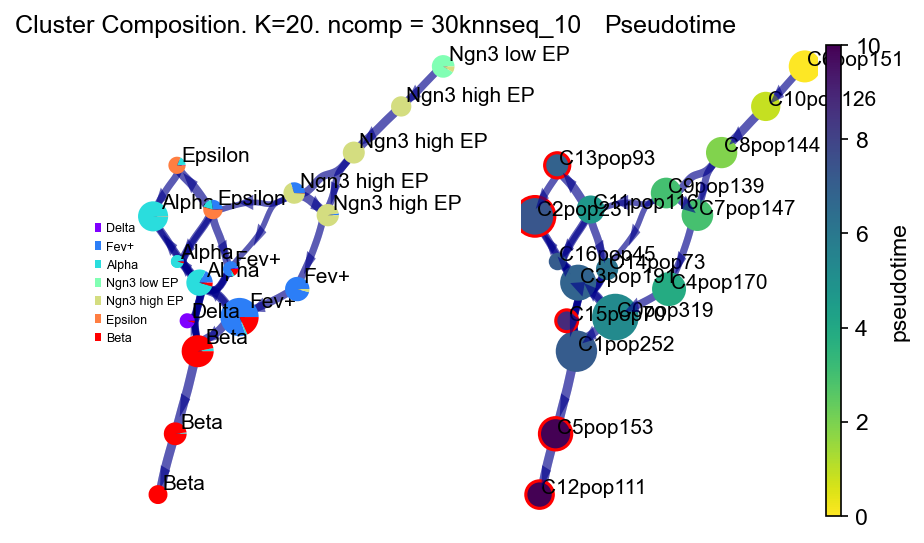

2022-07-09 15:08:06.512773	Time elapsed 8.2 seconds


In [13]:
# Set some parameters
jac_std_global = 0.15 #(smaller values increase granularity of clusters)
cluster_graph_pruning_std = 0.5 #(smaller values remove more edges in the cluster graph)
v0_toobig = .3 #(clusters that form more than 30% of entire population will be re-clustered)
root = None # No user-defined guidance for finding initial state [63] is a suitable root cell index  
dataset = '' 
random_seed = 42
velo_weight=0.5 #weight given to velocity matrix from scvelo. 1-velo_weight is assigned to gene-gene kernel
embedding = adata.obsm['X_umap'][:, 0:2]
true_label = adata.obs['clusters'].tolist()
velocity_matrix=adata.layers['velocity']
gene_matrix=adata.X.todense()
pca_loadings = adata.varm['PCs'] # this is optional and offers slight adjustment of the locations of cells based on velocity

#impute genes we want to use in gene-trends later 
gene_list_magic_short = ['Sst','Ins1','Ins2','Gcg','Ghrl']
df_ = pd.DataFrame(adata.X.todense())
df_.columns = [i for i in adata.var_names]
df_ = df_[gene_list_magic_short]


v0 = via.VIA(adata.obsm['X_pca'][:, 0:n_pcs], true_label, jac_std_global=jac_std_global, dist_std_local=1, knn=knn,
             too_big_factor=v0_toobig, root_user=root, dataset=dataset, random_seed=random_seed,
           is_coarse=True, preserve_disconnected=True, pseudotime_threshold_TS=50,
             cluster_graph_pruning_std=cluster_graph_pruning_std,
             piegraph_arrow_head_width=0.15,
             piegraph_edgeweight_scalingfactor=2.5, velocity_matrix=velocity_matrix,
                    gene_matrix=gene_matrix, velo_weight=velo_weight,  edgebundle_pruning_twice=False, edgebundle_pruning=0.15, pca_loadings = adata.varm['PCs']) # pca_loadings is optional #edge_bundling_twice = True would remove more of the edges
v0.run_VIA()


### Visualize trajectory and cell progression
Fine grained vector fields

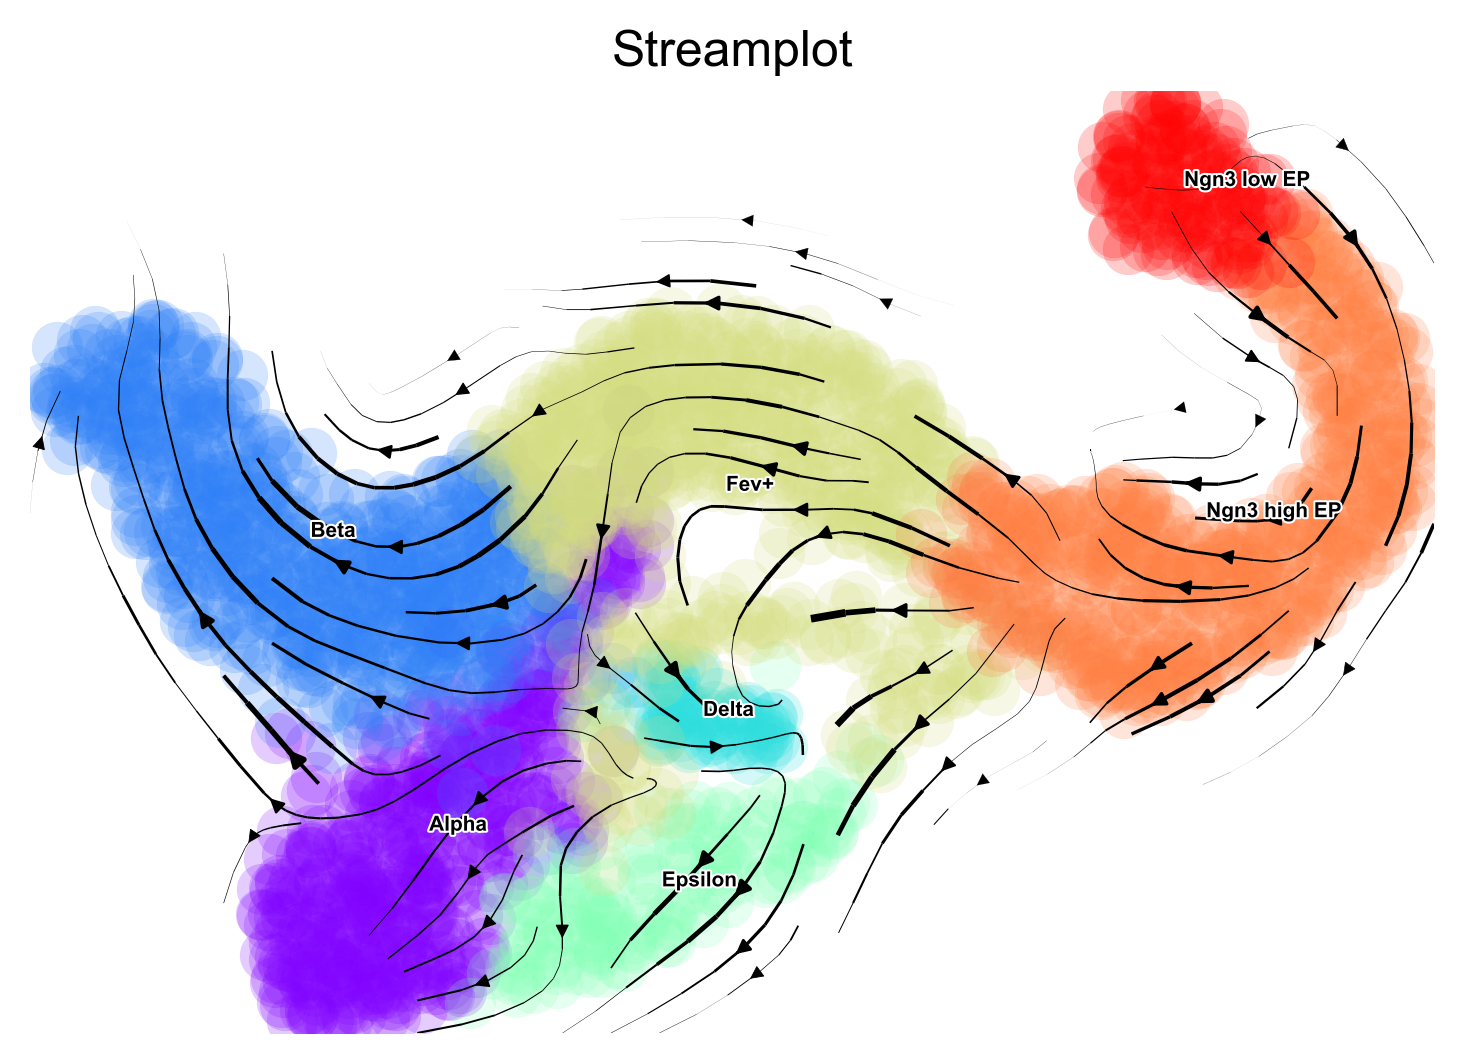

In [14]:
via.via_streamplot(via_coarse=v0, embedding=embedding, scatter_size=150, scatter_alpha=0.2,
                   marker_edgewidth=0.05, density_stream=1.0, density_grid=0.5, smooth_transition=2,
                   smooth_grid=0.5, color_scheme='annotation', add_outline_clusters=False,
                   cluster_outline_edgewidth=0.001)


2022-07-09 15:12:17.280587	Inside animated. File will be saved to location /home/shobi/Trajectory/Datasets/Pancreas/animation_pancreas_density1.gif


  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

total number of stream lines 365


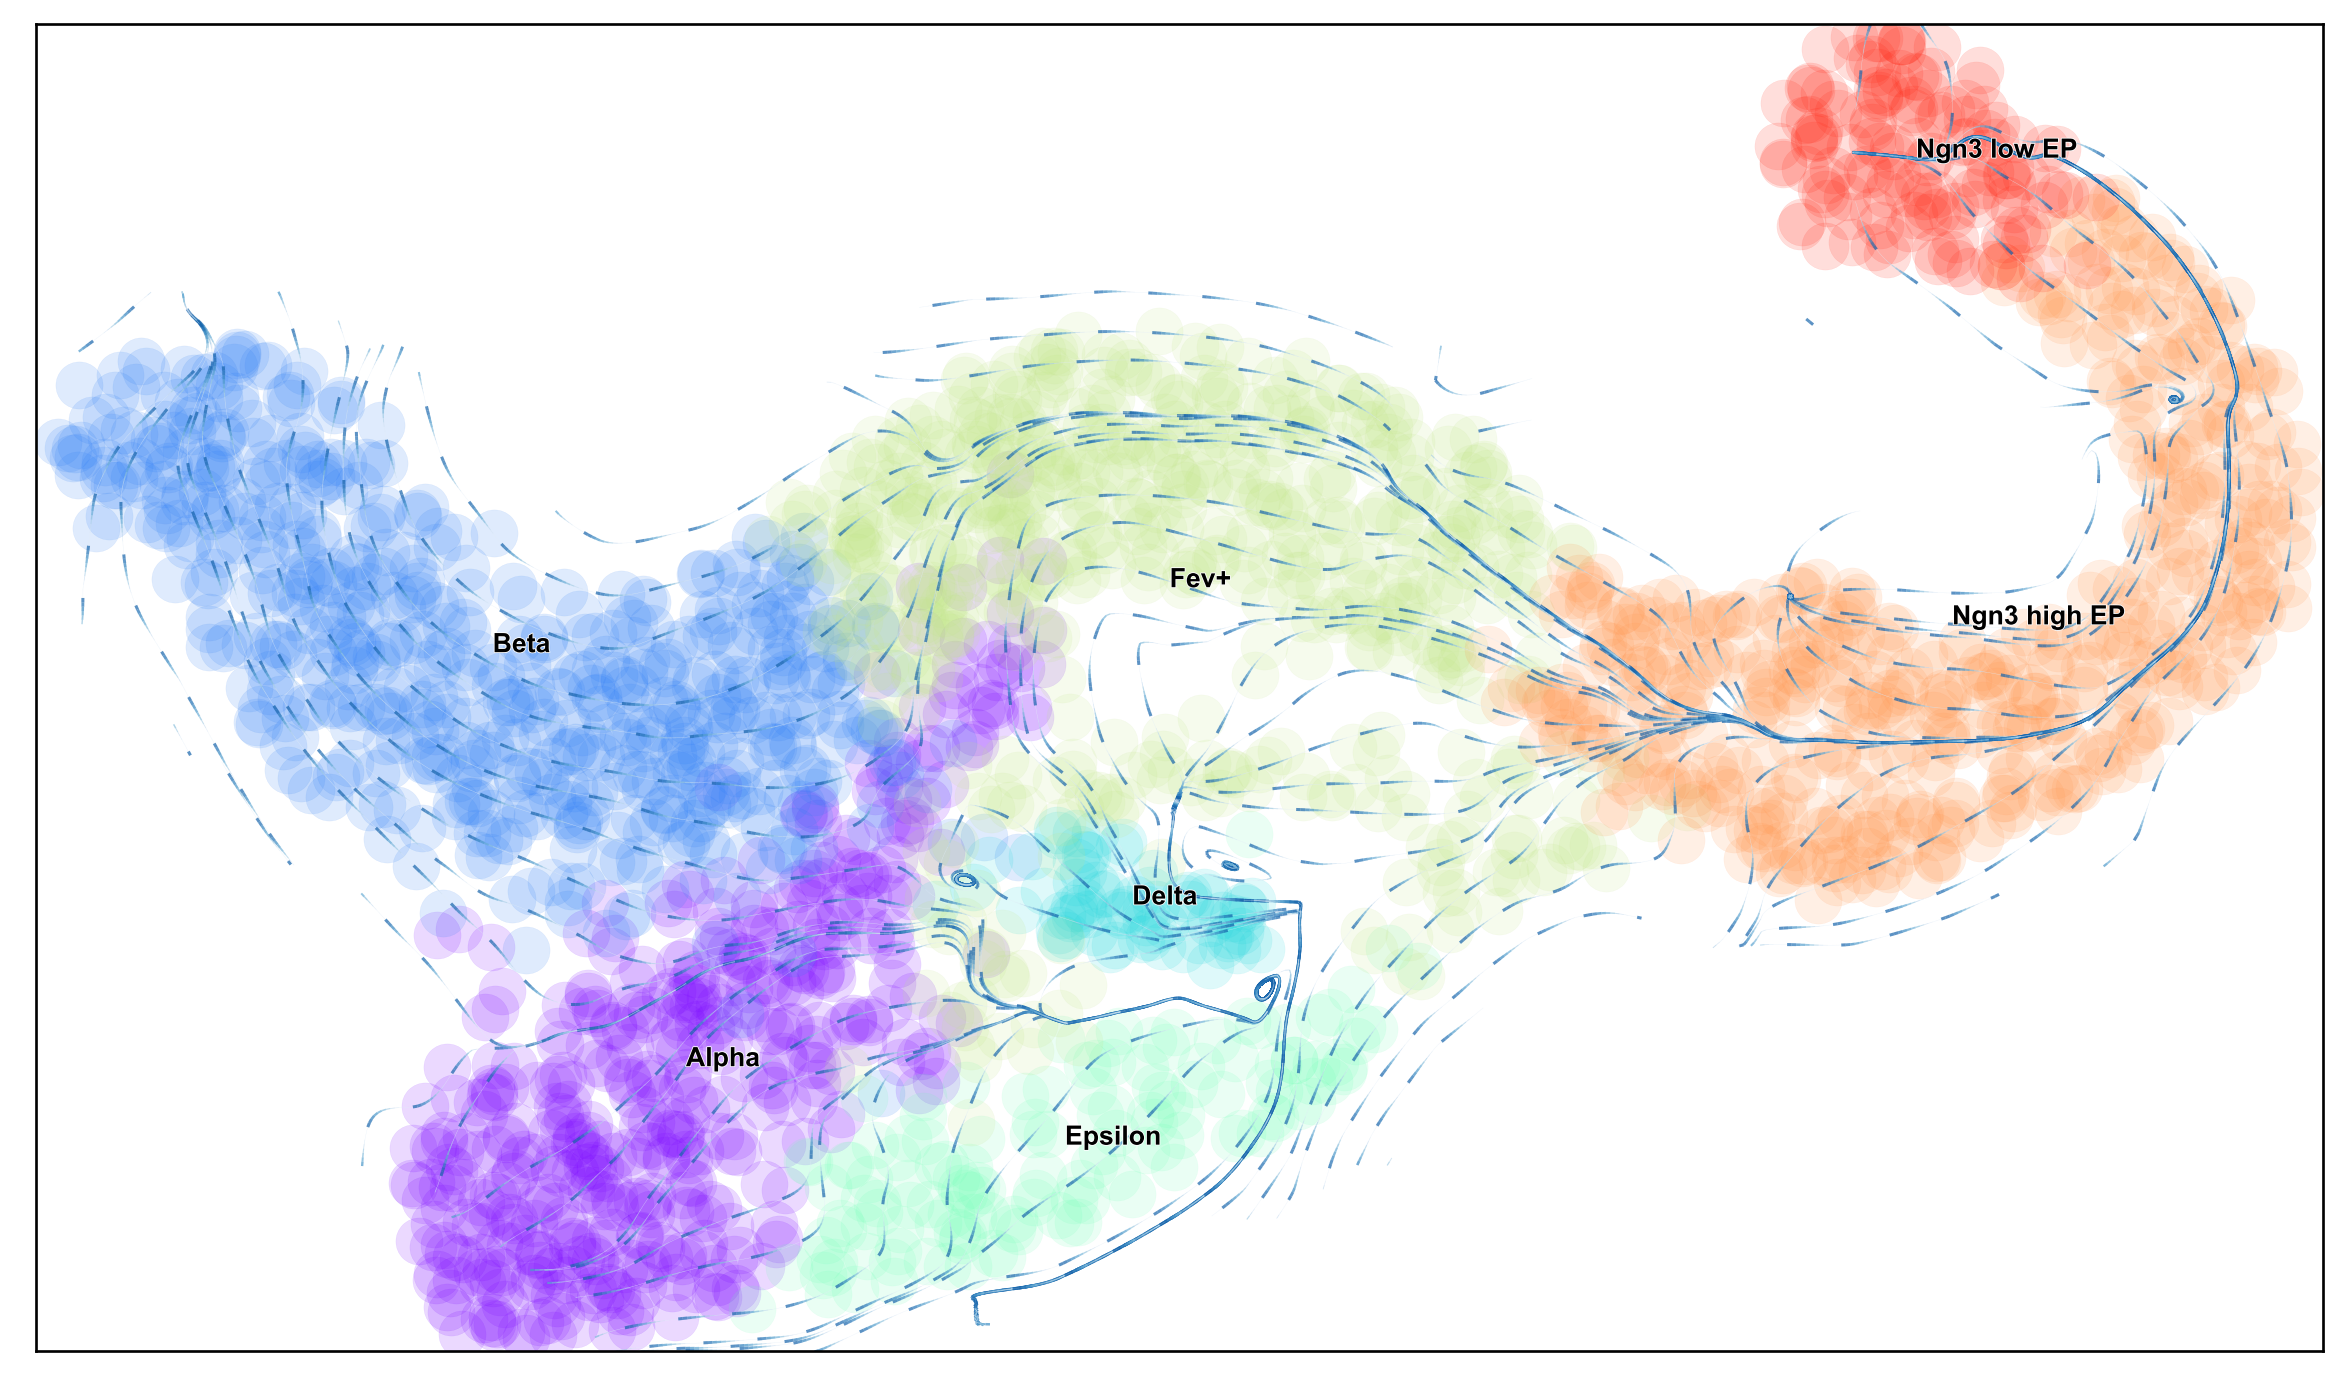

In [16]:
sc.settings.set_figure_params(dpi=120, facecolor='white')
via.animated_streamplot(v0, embedding, scatter_size=200, scatter_alpha=0.15, density_grid=1,  saveto='/home/shobi/Trajectory/Datasets/Pancreas/animation_pancreas_density1.gif' )

View animation [here](https://github.com/ShobiStassen/VIA/blob/master/Figures/animation_pancreas_density1.gif?raw=true)


### Draw lineage likelihoods
These indicate potential pathways corresponding to the 4 islets (two types of Beta islets Lineage 5 and 12)

Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 2 : [6, 10, 8, 9, 11, 13, 2]
Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 5 : [6, 10, 8, 7, 4, 0, 1, 5]
Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 12 : [6, 10, 8, 7, 4, 0, 1, 5, 12]
Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 13 : [6, 10, 8, 9, 11, 13]
Cluster path on clustergraph starting from Root Cluster 6 to Terminal Cluster 15 : [6, 10, 8, 7, 4, 0, 1, 15]
2022-04-28 14:56:43.020014	Cluster level path on sc-knnGraph from Root Cluster 6 to Terminal Cluster 1 along path: [6, 6, 6, 6, 10, 8, 7, 4, 1, 1, 1]


2022-04-28 14:56:43.094795	Cluster level path on sc-knnGraph from Root Cluster 6 to Terminal Cluster 2 along path: [6, 6, 6, 6, 10, 8, 9, 11, 13, 2, 2, 2]
2022-04-28 14:56:43.184272	Cluster level path on sc-knnGraph from Root Cluster 6 to Terminal Cluster 3 along path: [6, 6, 6, 6, 10, 8, 7, 4, 0, 3, 3, 3, 3, 3, 3]
2022-04-28 14:56:43.257134	Cluster level path on sc-knnGraph from Root Cluster 6 to Terminal Cluster 4 along path: [6, 6, 6, 6, 10, 8, 9, 4, 4, 4]


2022-04-28 14:56:43.347886	Cluster level path on sc-knnGraph from Root Cluster 6 to Terminal Cluster 5 along path: [6, 6, 6, 6, 10, 8, 9, 11, 1, 5, 5, 5, 5]


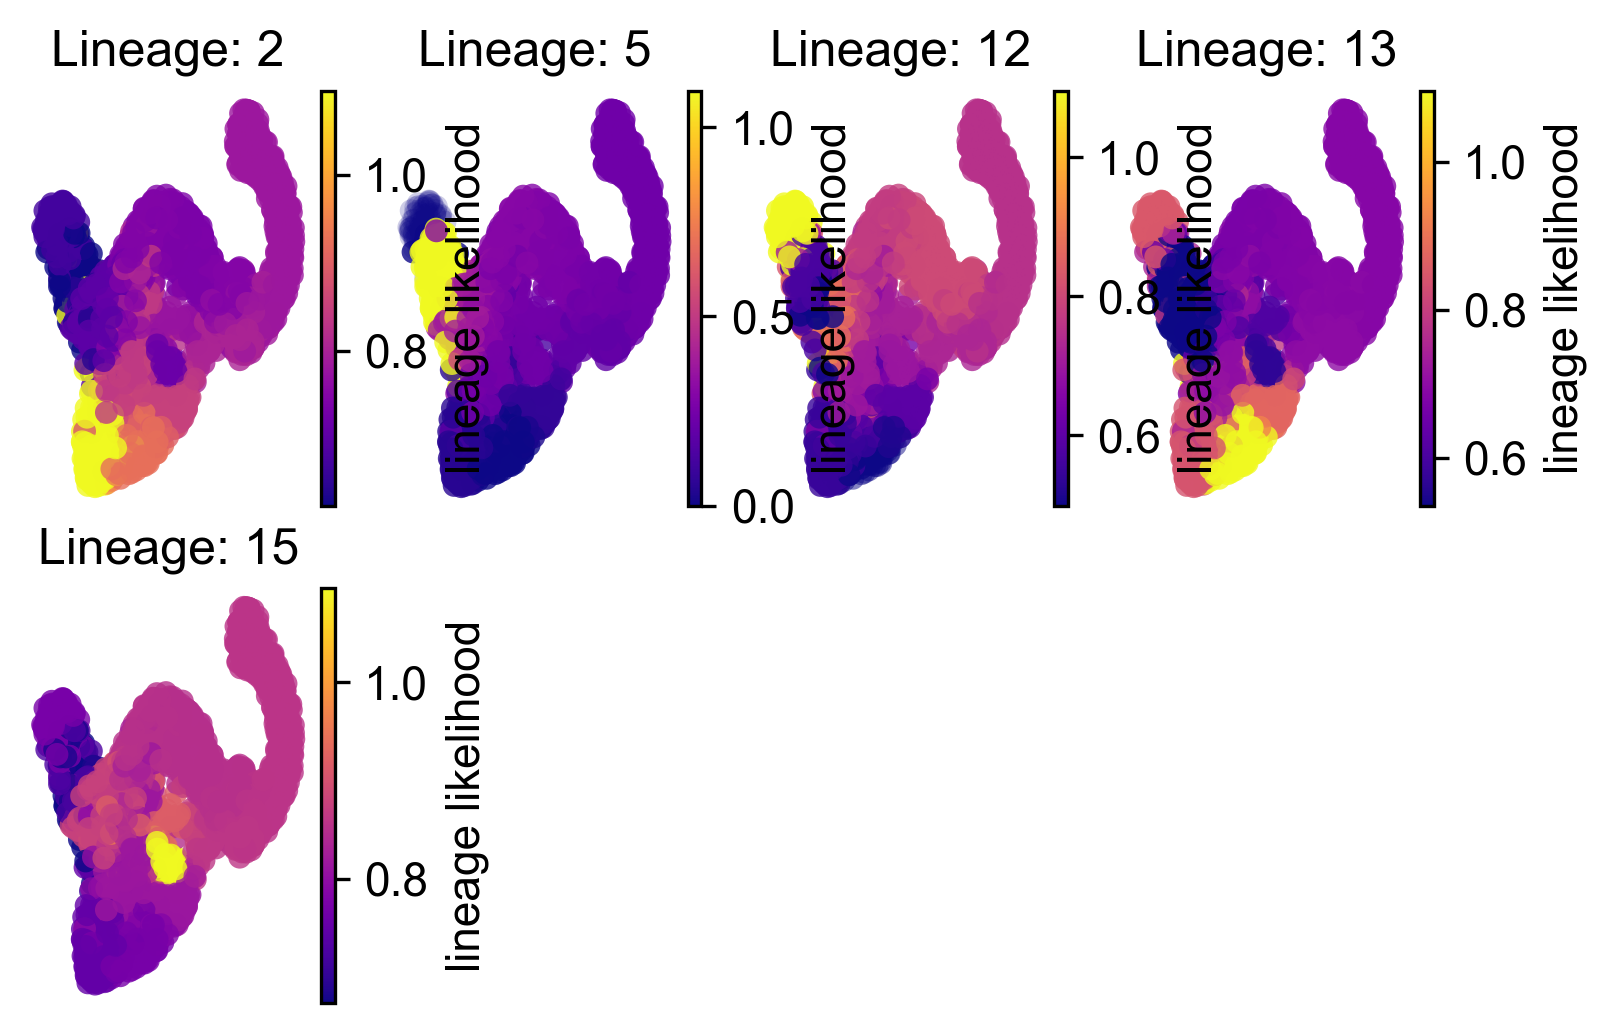

In [8]:
via.draw_sc_lineage_probability(via_coarse=v0,via_fine=v0,embedding= embedding)
#plt.show()

### Gene trends  
We can recover trends of islet-associated marker genes as they vary with pseudotime 

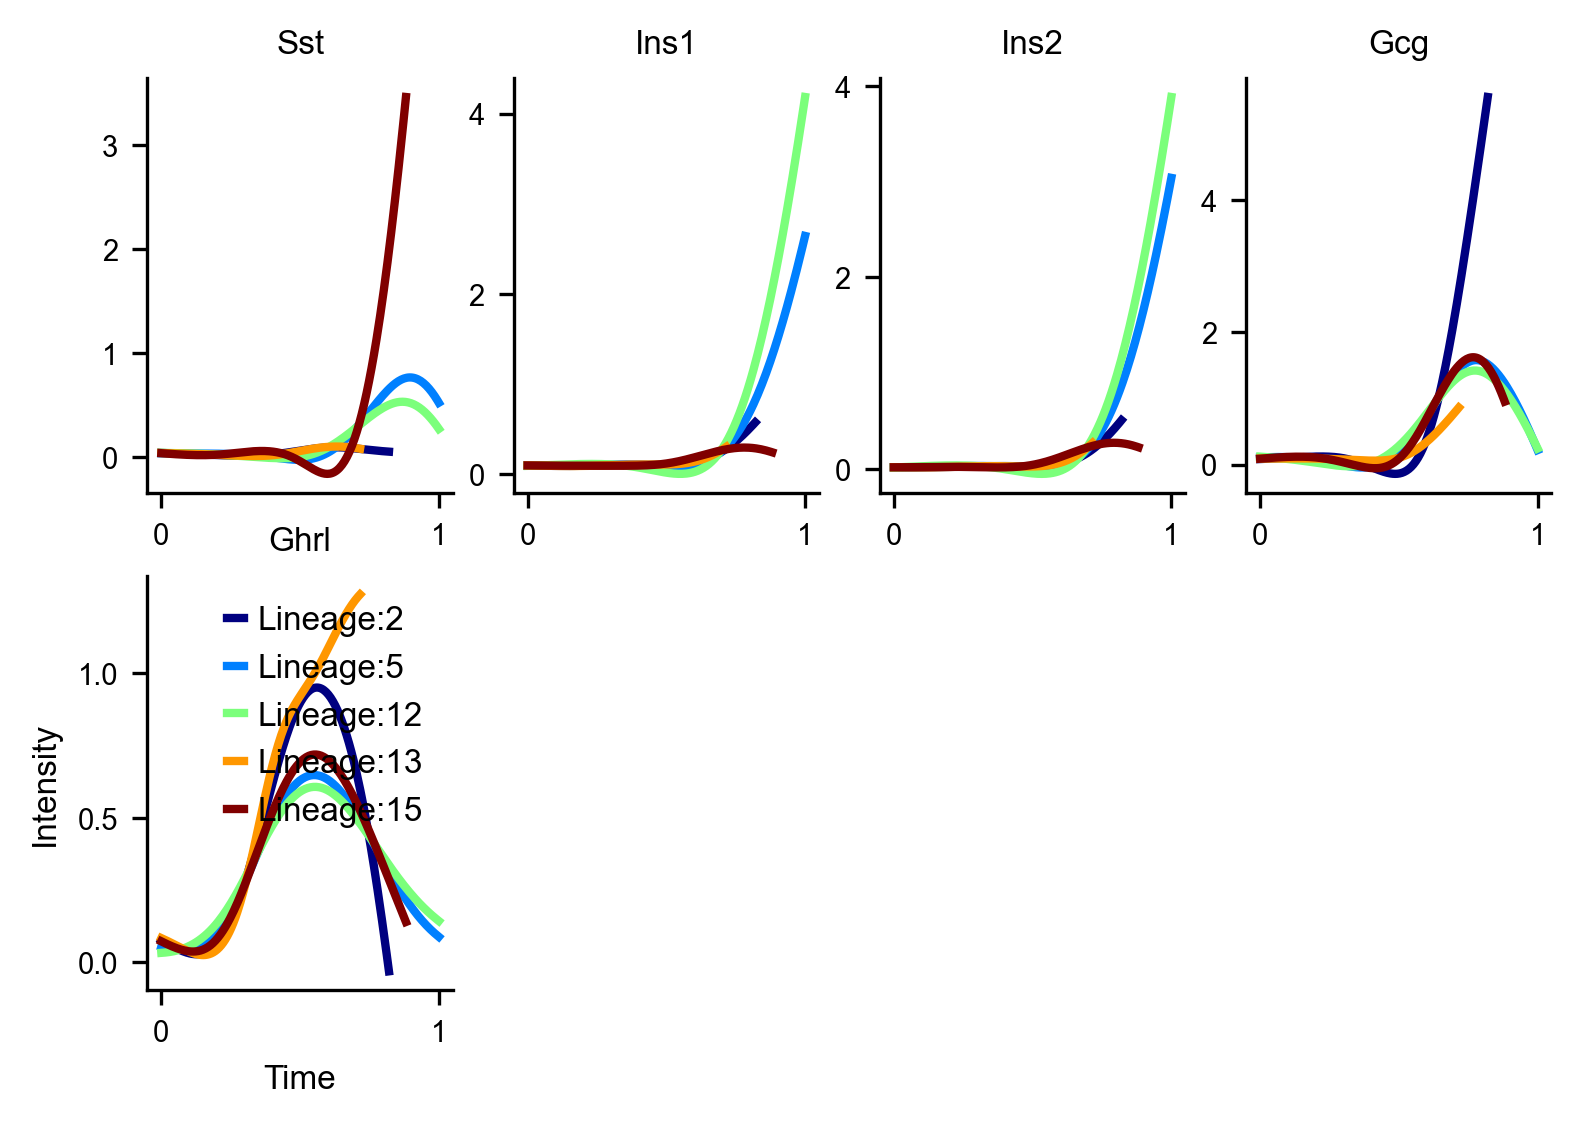

In [11]:
df_magic = v0.do_impute(df_, magic_steps=3, gene_list=gene_list_magic_short)

v0.get_gene_expression(df_magic)



N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 81% (9 of 11) |####################     | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:  00:00:00

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:   0:00:00

 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00

super cluster 2 is a super terminal with sub_terminal cluster 2
super cluster 5 is a super terminal with sub_terminal cluster 5
super cluster 12 is a super terminal with sub_terminal cluster 12
super cluster 13 is a super terminal with sub_terminal cluster 13
super cluster 15 is a super terminal with sub_terminal cluster 15


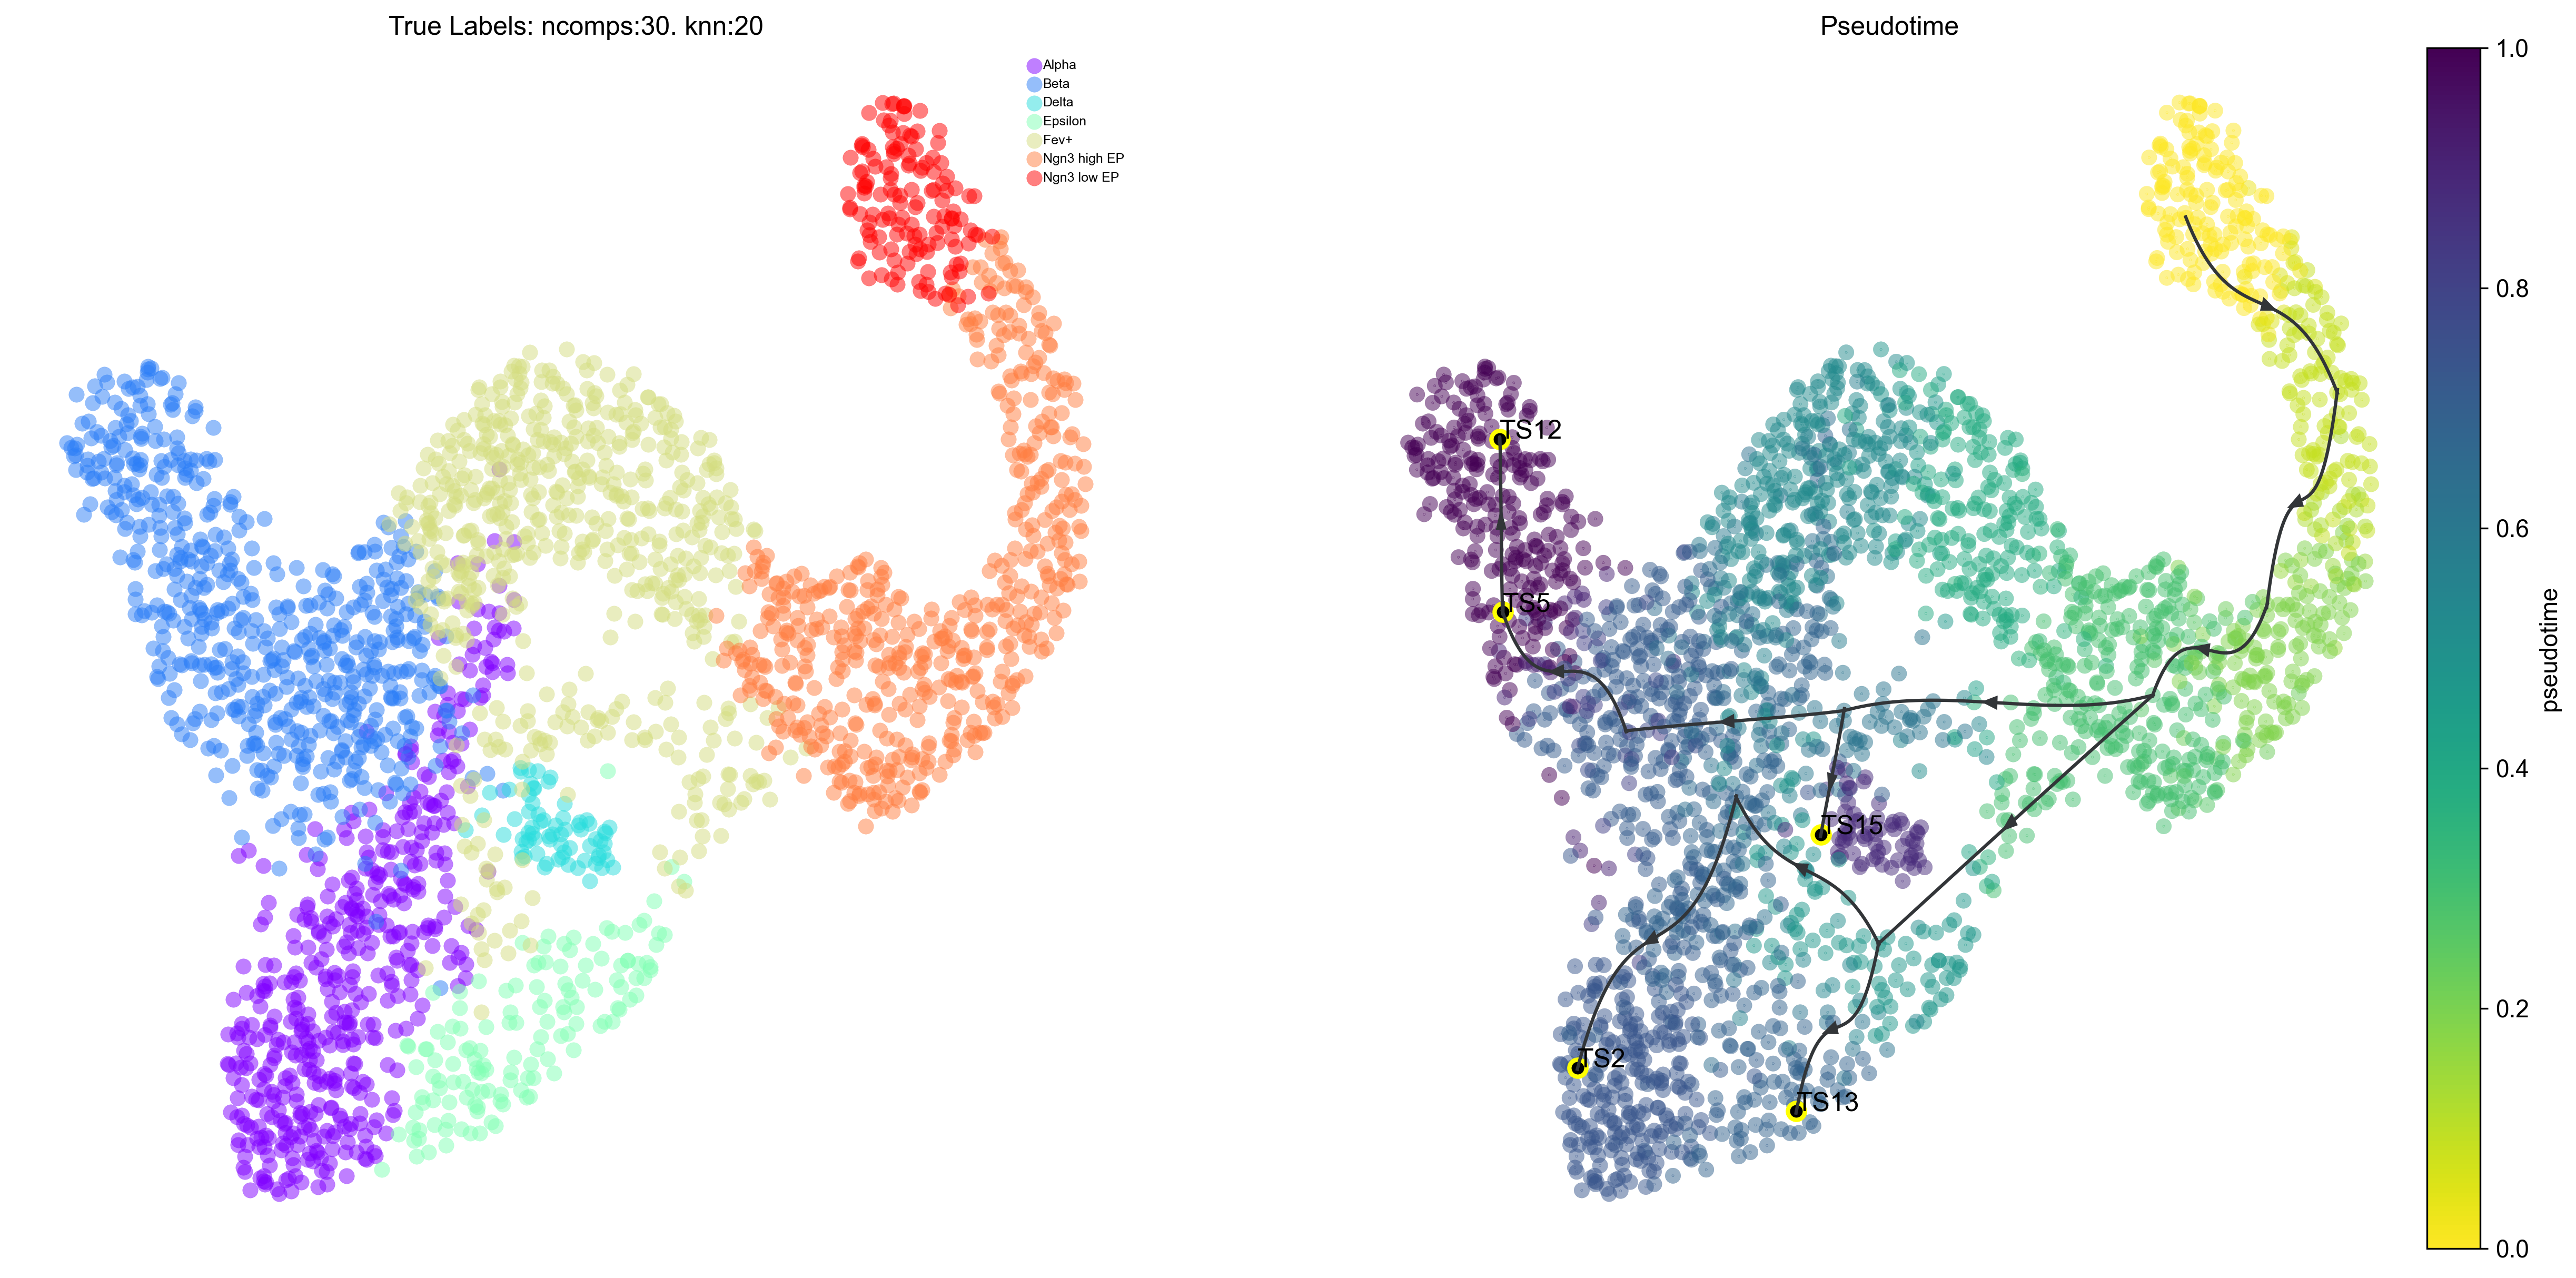

In [13]:

via.draw_trajectory_gams(via_coarse=v0,via_fine=v0, draw_all_curves=False, embedding=embedding)


### Via graph

Redraw the viagraph, finetune arrow head width

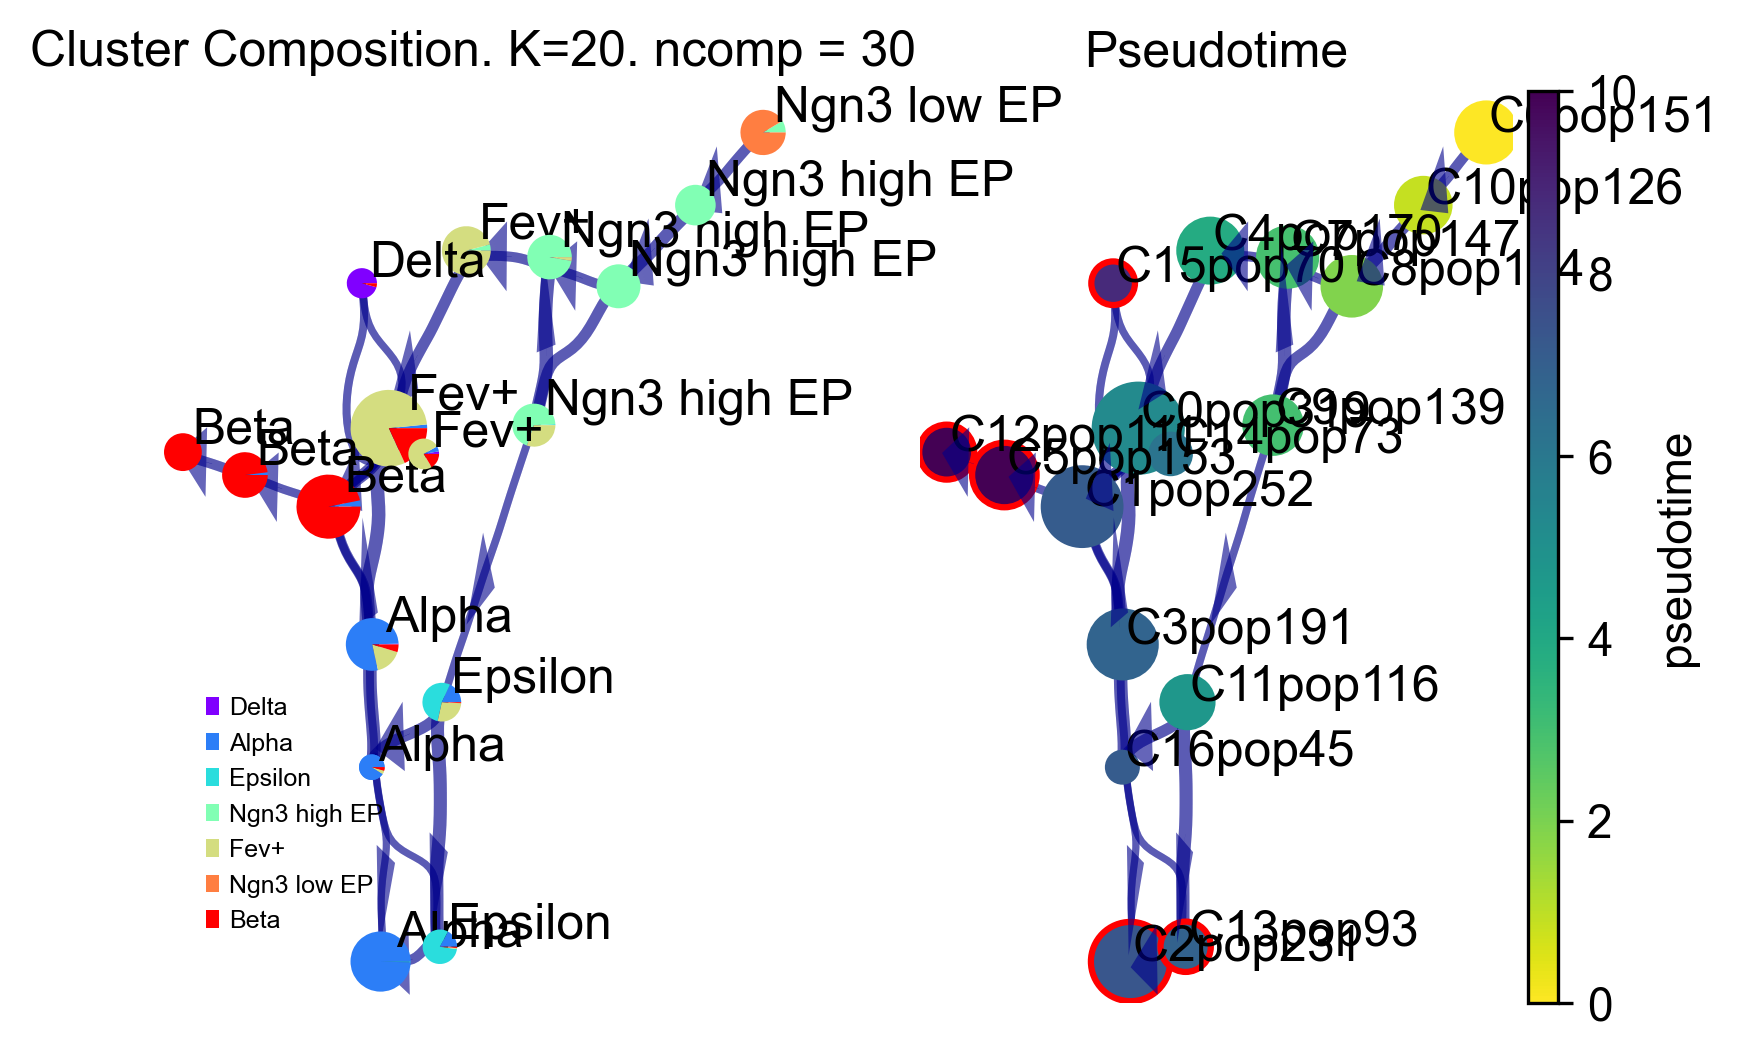

In [14]:

v0.draw_piechart_graph(headwidth_bundle=0.2)